## Observations and Insights 

In [1]:
# Analysis & Observation
# 1.
# 2.
# 3.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")
# Display the data table for preview
combined_data.head()


# print(mouse_metadata)
# print(study_results)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
# combined_data['Mouse ID'].count
# number_unique_mice=len(combined_data['Mouse ID'].unique())
# number_unique_mice
number_mice=len(combined_data['Mouse ID'])
number_mice

1893

In [4]:
number_unique_mice=len(combined_data['Mouse ID'].unique())
number_unique_mice

249

In [5]:
number_mice_2=combined_data["Mouse ID"].value_counts()
number_mice_2

g989    13
k403    10
b742    10
o287    10
c139    10
        ..
b447     1
h428     1
u153     1
x226     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_3 = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
duplicate_mice_3

array(['g989'], dtype=object)

In [7]:
# clean_df= combined_data.drop_duplicates()
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_3)==False]

# cleaned_data=combined_data[combined_data['Mouse ID'].isin(drop_data)==False]
# cleaned_data=drop_data.loc[:,'Mouse ID'].unique()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
dropped_data=clean_df["Mouse ID"].unique()
dropped_data

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

In [9]:
len_dropped_data=len(clean_df["Mouse ID"].unique())
len_dropped_data

248

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 



In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df=pd.DataFrame(drop_data)


In [12]:
# clean_df

In [13]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regime_group=clean_df.groupby('Drug Regimen')

regimen_mean=regime_group["Tumor Volume (mm3)"].mean()
# print(regimen_mean)
regimen_median=regime_group["Tumor Volume (mm3)"].median()
# print(regimen_median)
regimen_variance=regime_group["Tumor Volume (mm3)"].var()
# print(regimen_variance)
regimen_std_dev=regime_group["Tumor Volume (mm3)"].std()
# print(regimen_std_dev)
regimen_sem=regime_group["Tumor Volume (mm3)"].sem()
# print(regimen_sem)

summary_statistics_df=pd.DataFrame({
    "Mean": regimen_mean, 
    "Median":regimen_median,
    "Variance": regimen_variance, 
    "Standard Deviation":regimen_std_dev, "SEM": regimen_sem })
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


In [17]:
combined_group=combined_data.groupby('Drug Regimen')

In [18]:
# Count how many times each maker appears in our group
count_makers = combined_group['Mouse ID'].count()

count_makers

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

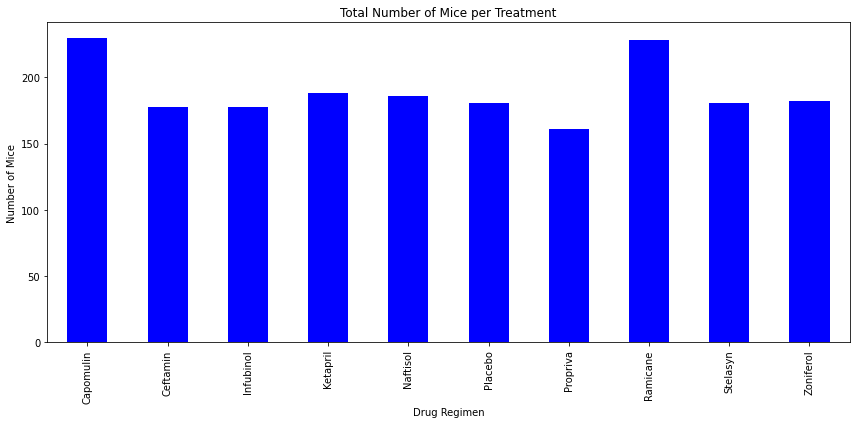

In [19]:
bar_pandas=count_makers.plot(kind="bar", figsize=(12,6), color='b')
bar_pandas.set_ylabel("Number of Mice")
plt.title("Total Number of Mice per Treatment")
plt.tight_layout()
plt.show()

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


In [21]:
# number_of_mice = [Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol]
x_axis = np.arange(len(count_makers))
# x_axis
tick_locations = [value for value in x_axis]
# tick_locations
# number_of_mice = [Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol]

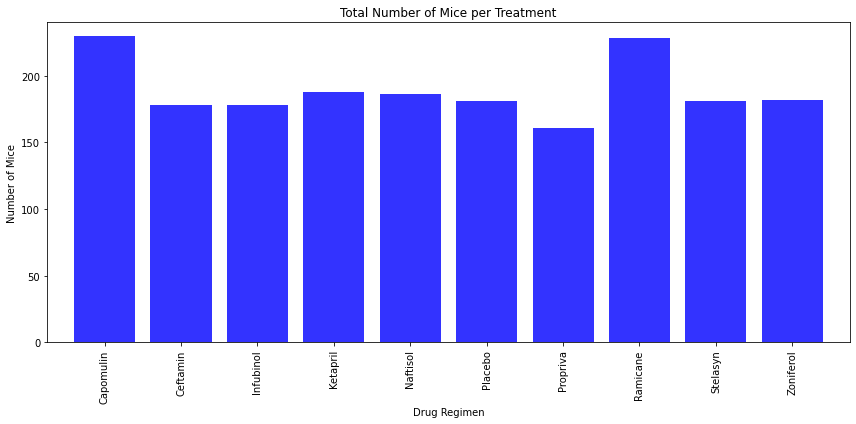

In [22]:
plt.figure(figsize=(12,6))
plt.bar(x_axis, count_makers, color='b', alpha=.80, align="center")
plt.xticks(tick_locations, ['Capomulin', 
                            'Ceftamin', 'Infubinol', 'Ketapril', 
                            'Naftisol', 'Placebo', 'Propriva', 
                            'Ramicane', 'Stelasyn', 'Zoniferol'] , rotation="vertical")
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(count_makers)+10)
# Set a Title and labels
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
# # Save our graph and show the grap
plt.tight_layout()
# plt.savefig("../Images/avg_state_rain.png")
plt.show()

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = combined_data.groupby("Sex")
unique_gender_count = gender_group.nunique()["Mouse ID"]
unique_gender_count

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

In [24]:
total_mice=len(combined_data['Mouse ID'].unique())
total_mice

249

In [25]:
gender_percent=(unique_gender_count/total_mice)*100
gender_percent

Sex
Female    49.799197
Male      50.200803
Name: Mouse ID, dtype: float64

In [26]:
gender_df=pd.DataFrame({"Total Count": unique_gender_count, "Percentage of Gender":gender_percent})
gender_df.sort_values(["Total Count"], ascending = False).style.format({"Percentage of Gender":"{:.2f}%"})

,Total Count,Percentage of Gender
Sex,,
Male,125,50.20%
Female,124,49.80%


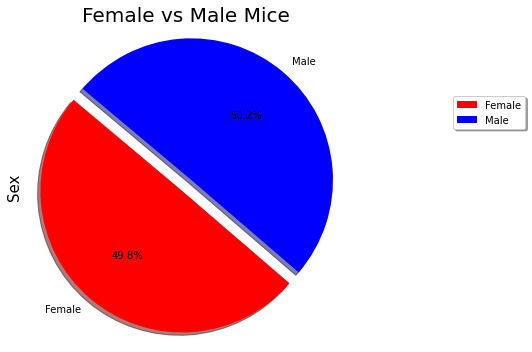

In [27]:
colors = ['red', 'blue']
explode = (0.1, 0)
gender_plot=gender_df.plot.pie(y= 'Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
# gender_df.plot.pie(subplots=True, shadow = True,startangle=90,
# figsize=(15,10), autopct='%1.1f%%')
plt.axis("equal")
plt.title('Female vs Male Mice',fontsize = 20)
plt.ylabel('Sex',fontsize = 15)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender=['Female', 'Male']
percent = [49.8, 50.2]
colors = ['red', 'blue']
explode = (0.1,0)

In [ ]:
plt.pie(percent, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, )
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Female vs Male Mice',fontsize = 20)
plt.ylabel('Sex',fontsize = 15)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# grouped_mouse=combined_data.groupby('Drug Regimen')

# # Calculate
# treatment_count=grouped_mouse['Mouse ID'].count()
# # treatment_count
# time_count=grouped_mouse['Timepoint'].max()
# # time_count

In [ ]:
# capomulin_df = pd.DataFrame(time_count)
# capomulin_df

In [ ]:
# reset_df = capomulin_df.reset_index()
# reset_df.head()

In [ ]:
# pd_merge = pd.merge(capomulin_df, combined_data, on=("Drug Regimen","Timepoint"),how="left")
# pd_merge

In [ ]:
# tumor_vol=pd_merge["Tumor Volume (mm3)"]
# tumor_vol

In [ ]:
# # treatment_regimens=combined_data.loc['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# treatment_regimens=combined_data[['Drug Regimen', 'Timepoint', 'Mouse ID']]
# treatment_regimens

In [ ]:
# grouped_data = treatment_regimens.groupby(['Drug Regimen', "Timepoint", 'Mouse ID'])
# print(grouped_data)

In [ ]:
# treatment_count=grouped_data["Mouse ID"].count()
# treatment_count

In [ ]:
# capomulin_vol = pd.DataFrame(grouped_data)
# capomulin_vol

In [ ]:
# capomulin_merge = pd.merge(capomulin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
# capomulin_merge.head()

In [ ]:
# # Example outlier plot of reaction times
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times)
# plt.show()
# # We need to sort the data to determine which could be outliers
# times.sort()
# print(times)
# # The second example again looks at the LAX temperature data set and computes quantiles
# temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
# temperatures = temperature_df['HourlyDryBulbTemperature']

# fig1, ax1 = plt.subplots()
# ax1.set_title('Temperatures at LAX')
# ax1.set_ylabel('Temperature (°F)')
# ax1.boxplot(temperatures)
# plt.show()
# # If the data is in a dataframe, we use pandas to give quartile calculations
# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of temperatures is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The the median of temperatures is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [ ]:
# # Determine if there are any potential outliers in the average occupancy in California
# quartiles = california_data['AveOccup'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of occupancy is: {lowerq}")
# print(f"The upper quartile of occupancy is: {upperq}")
# print(f"The interquartile range of occupancy is: {iqr}")
# print(f"The the median of occupancy is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

# outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
# outlier_occupancy

In [ ]:
# # Retrieve the columns specified
# extract_columns=purchase_data[['Item ID', 'Item Name', 'Price']]

# # Group by the columns specified
# grouped_id_name = extract_columns.groupby(["Item ID", "Item Name"])

# # Calculate respective to the grouped columns
# purchase_count=grouped_id_name["Item Name"].count()
# total_purchase_value=grouped_id_name["Price"].sum()
# item_price=total_purchase_value/purchase_count

# # Create and format Data Frame
# most_popular_df=pd.DataFrame({
#     "Purchase Count": purchase_count, 
#     "Item Price":item_price,
#     "Total Purchase Value": total_purchase_value})

# top_5_popular=most_popular_df.sort_values(["Purchase Count"], ascending = False).head()

# top_5_popular.style.format({"Item Price":"${:.2f}",
#                                            "Total Purchase Value":"${:.2f}"})

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# # Create empty list to fill with tumor vol data (for plotting)

# tumor_vol=[]


# for treatment in treatments:
#     quartiles = pd_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75]).round(2)
#     lowerq = quartiles[0.25].round(2)
#     upperq = quartiles[0.75].round(2)
#     iqr = round(upperq-lowerq,2)
#     lower_bound = round(lowerq - (1.5*iqr),2)
#     upper_bound = round(upperq + (1.5*iqr),2)
    
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
#     # add subset 
    
    
#     # Determine outliers using upper and lower bounds
    


#     if counter == 0:
    
#         print(f"{treatment} IQR data is:")
#         print(f"The lower quartile of {treatment} is: {lowerq}")
#         print(f"The upper quartile of {treatment} is: {upperq}")
#         print(f"The interquartile range of {treatment} is: {iqr}")
#         print(f"The the median of {treatment} is: {quartiles[0.5]} ")
#         print(f"Values below {lower_bound} for {treatment} could be outliers.")
#         print(f"Values above {upper_bound} for {treatment} could be outliers.")
        
#     counter += 1

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"]== "Capomulin",:]
capomulin_df

In [ ]:
unique_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
unique_mouse_df

In [ ]:
# x_axis = unique_mouse_df["Timepoint"]
# x_axis
x_axis = np.arange(0, 100, 10)
# x_axis
tumor_vol = unique_mouse_df["Tumor Volume (mm3)"]
# tumor_vol
plt.plot(x_axis, tumor_vol,linewidth=2, markersize=10,marker="o",color="blue")
plt.title('Treatmeant of Mouse s185',fontsize =15)
plt.xlabel('Timepoint',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize =10)
plt.grid()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_mouse_cap=capomulin_df.groupby(['Mouse ID']).mean()
# avg_mouse_cap
avg_tum_vol=avg_mouse_cap['Tumor Volume (mm3)']
# avg_tum_vol
avg_weight_vol=avg_mouse_cap['Weight (g)']
# avg_weight_vol
plt.scatter(avg_weight_vol, avg_tum_vol, marker="o", facecolors="blue", edgecolors="black")
plt.title('Average Mouse Weight vs Average Tumor Volume',fontsize =15)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_weight_vol,avg_tum_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
y_values=avg_mouse_cap['Tumor Volume (mm3)']
x_values=avg_mouse_cap['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Weight (g)', fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)', fontsize =10)
plt.title('Regression of Average Mouse Weight vs Average Tumor Volume',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,30),fontsize=15,color="red")
# plt.xlabel('Weight (g)', fontsize =10)
# plt.ylabel('Averag Tumor Volume (mm3)', fontsize =10)
# plt.title('Regression of Average Mouse Weight vs Average Tumor Volume',fontsize =13)
# print(f"The r-squared is: {rvalue**2}")
# plt.show()